In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [40]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(perch_length, perch_weight, random_state=42)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
X_train.shape

(42, 1)

In [6]:
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train, y_train)
knr.score(X_test, y_test)

0.9746459963987609

In [7]:
print(knr.predict([[50]]))

[1033.33333333]


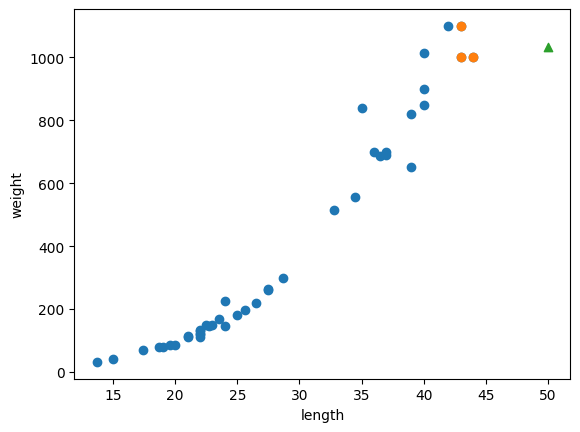

In [9]:
distances, indexes = knr.kneighbors([[50]])

plt.scatter(X_train, y_train)
plt.scatter(X_train[indexes], y_train[indexes], marker='o')

plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [11]:
print(knr.predict([[1000]]))

[1033.33333333]


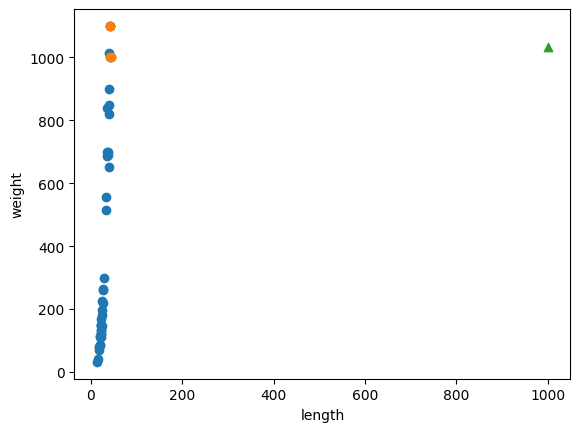

In [12]:
distances, indexes = knr.kneighbors([[1000]])

plt.scatter(X_train, y_train)
plt.scatter(X_train[indexes], y_train[indexes], marker='o')

plt.scatter(1000, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

k-최근접 이웃 회귀는 가장 가까운 샘플을 찾아 타깃의 평균을 구해 값을 예측하는데, 새로운 샘플이 훈련 세트의 범위를 벗어나면 완전 엉뚱한 값을 예측할 수 있다.<br>
이러한 문제를 선형 회귀(Linear Regression) 알고리즘을 통해 해결해보자.

# 선형 회귀(Linear Regression)

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8247503123313558

In [14]:
print(lr.predict([[50]]))

[1241.83860323]


In [15]:
print(lr.predict([[1000]]))

[38308.12631868]


In [17]:
print(lr.coef_, lr.intercept_) # coefficient = weight

[39.01714496] -709.0186449535477


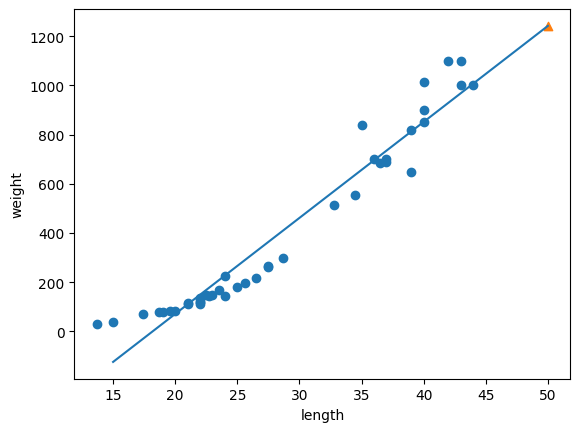

In [22]:
plt.scatter(X_train, y_train)
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])

plt.scatter(50, lr.predict([[50]]), marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [24]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.939846333997604
0.8247503123313558


위 결과를 보면 훈련 세트와 테스트 세트 간의 차이가 있는 것을 볼 수 있으며, 그중에서 훈련 세트가 0.11정도 더 크다. 따라서 훈련 세트에 조금 과대적합된 것으로 볼 수 있다.<br>
그러나 훈련 세트의 점수도 그렇게 높은 편이 아니므로 오히려 전체적으로 과소적합되었다고 볼 수도 있다.<br>
그리고 위 그래프에서 좌측 아래를 보면 제대로 예측하지 못하고 있다는 것을 확인할 수도 있다.


In [45]:
X_train = np.column_stack((X_train**2, X_train))
X_test = np.column_stack((X_test**2, X_test))
print(X_train.shape, X_test.shape)
X_train[0]

(42, 2) (14, 2)


array([384.16,  19.6 ])

In [46]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9775935108325122

In [30]:
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [32]:
print(lr.coef_, lr.intercept_)
# weight = 1.01*length^2 - 21.56*length + 116.05

[  1.01433211 -21.55792498] 116.0502107827827


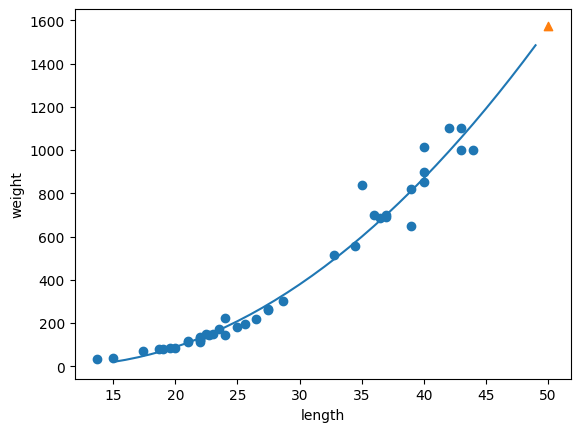

In [44]:
point = np.arange(15, 50)

plt.scatter(X_train, y_train)
plt.plot(point, 1.01*point**2 - 21.56*point + 116.05)
plt.scatter(50, 1574, marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [47]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
# 여전히 테스트 세트가 더 높음 ~ 아직도 과소적합

0.9706807451768623
0.9775935108325122
